In [86]:
import os
from PIL import Image
import PIL as pil

In [156]:
# reuse this when necessary
directory = "./val/"
nameList = os.listdir(directory)
imageNames = []
for f in nameList:
    if "normal" in f or "pneumonia" in f:
        imageNames.append(f)

In [96]:
def getSize(imName,directory):
    im = Image.open(directory+imName)
    return im.size

In [28]:
sizes = []
for image in imageNames:
    sizes.append(getSize(image,directory))

In [157]:
# Resizing and cropping images
baseheight = 64
for image in imageNames:
    img = Image.open(directory+image)
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((wsize, baseheight), pil.Image.ANTIALIAS)
    
    left = (img.size[0] - 64)/2
    right = (img.size[0] + 64)/2
    dif = img.size[0]-64
    img = img.crop((dif/2, 0, img.size[0]-(dif/2), img.size[1]))
    
#   finish crop correctly
    img = img.crop((0,0,64,64))
    
    img = img.convert('L')
    img.save(directory+"resized_"+image+".png")

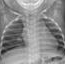

In [68]:
# Testing Cropping a single image
im = Image.open("./resized_train/"+"resized_train_normal_1.jpeg")
left = (width - 64)/2
right = (width + 64)/2
dif = im.size[0]-64
im.crop((dif/2, 0, im.size[0]-(dif/2), im.size[1]))


In [121]:
import numpy as np
img = Image.open("./resized_train/"+"resized_train_normal_1.png").convert('L')
arr = np.array(img)

In [162]:
class ImageInput(object):
    pass